<a href="https://colab.research.google.com/github/nazwa48/PCVK-_GENAP_2024/blob/main/Kuis_2_klasifikasi_spesies_burung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LAPORAN PCVK QUIZ 2

---


NIM : 2241720013

Nama : Nazwa Ayunda Mirrohillah

Kelas : TI-3C

# Unduh Dataset

Menggunakan API Kaggle untuk mengunduh dataset.

In [4]:
# Install dan setup Kaggle
!pip install kaggle

from google.colab import files
files.upload()  # Upload file kaggle.json

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Unduh dataset
!kaggle datasets download -d rahmasleam/bird-speciees-dataset

# Ekstrak dataset
!unzip bird-speciees-dataset.zip -d /content/bird


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/rahmasleam/bird-speciees-dataset
License(s): apache-2.0
 92% 14.0M/15.2M [00:01<00:00, 19.4MB/s]
100% 15.2M/15.2M [00:01<00:00, 11.9MB/s]
Archive:  bird-speciees-dataset.zip
  inflating: /content/bird/Bird Speciees Dataset/AMERICAN GOLDFINCH/001.jpg  
  inflating: /content/bird/Bird Speciees Dataset/AMERICAN GOLDFINCH/002.jpg  
  inflating: /content/bird/Bird Speciees Dataset/AMERICAN GOLDFINCH/003.jpg  
  inflating: /content/bird/Bird Speciees Dataset/AMERICAN GOLDFINCH/004.jpg  
  inflating: /content/bird/Bird Speciees Dataset/AMERICAN GOLDFINCH/005.jpg  
  inflating: /content/bird/Bird Speciees Dataset/AMERICAN GOLDFINCH/006.jpg  
  inflating: /content/bird/Bird Speciees Dataset/AMERICAN GOLDFINCH/007.jpg  
  inflating: /content/bird/Bird Speciees Dataset/AMERICAN GOLDFINCH/008.jpg  
  inflating: /content/bird/Bird Speciees Dataset/AMERICAN GOLDFINCH/009.jpg  
  inflating: /content/bird/Bird Speciees Data

# Load Data dan Normalisasi
Data di-load dari folder dengan transformasi ke tensor gambar.

In [5]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Fungsi untuk load data
def load_data(dataset_path):
    images = []
    labels = []
    class_names = sorted(os.listdir(dataset_path))

    for class_idx, class_name in enumerate(class_names):
        class_folder = os.path.join(dataset_path, class_name)
        for img_name in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_name)
            img = tf.keras.utils.load_img(img_path, target_size=(128, 128))
            img_array = tf.keras.utils.img_to_array(img)
            images.append(img_array)
            labels.append(class_idx)

    return np.array(images), np.array(labels), class_names

# Path dataset
dataset_path = '/content/bird/Bird Speciees Dataset'

# Load data
images, labels, class_names = load_data(dataset_path)

# Normalisasi
images = images / 255.0


# Hitung Gambar & Visualisasi
Menampilkan jumlah gambar di setiap kategori dan divisualisasikan dalam diagram batang.

Jumlah gambar per kategori:
AMERICAN GOLDFINCH: 143
BARN OWL: 129
CARMINE BEE-EATER: 131
DOWNY WOODPECKER: 137
EMPEROR PENGUIN: 139
FLAMINGO: 132


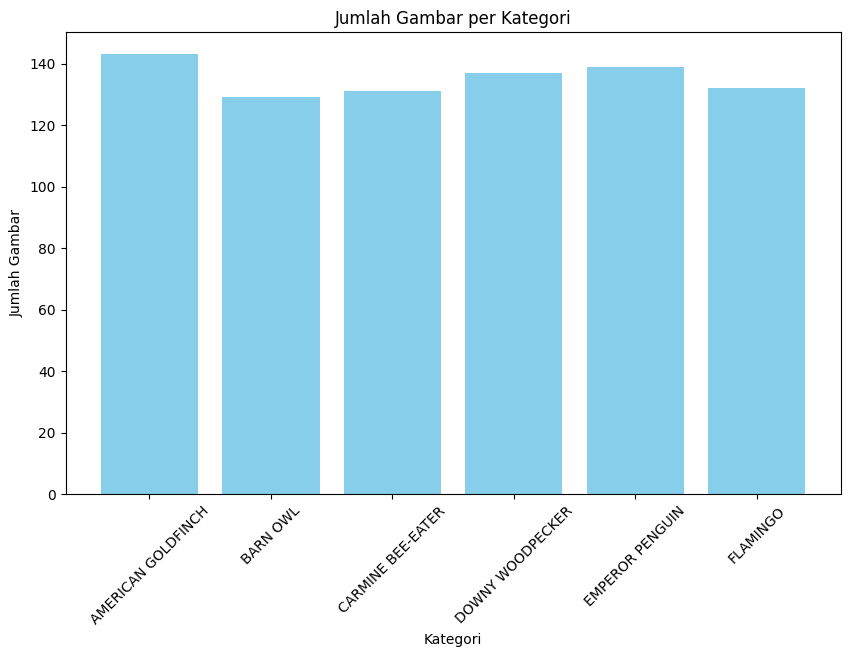

In [7]:
import matplotlib.pyplot as plt

# Fungsi untuk menghitung jumlah gambar per kategori
def count_images(dataset_path):
    class_counts = {}
    class_names = sorted(os.listdir(dataset_path))

    for class_name in class_names:
        class_folder = os.path.join(dataset_path, class_name)
        image_count = len(os.listdir(class_folder))
        class_counts[class_name] = image_count

    return class_counts

# Hitung jumlah gambar per kategori
class_counts = count_images(dataset_path)
print("Jumlah gambar per kategori:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")

# Visualisasi jumlah gambar
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel("Kategori")
plt.ylabel("Jumlah Gambar")
plt.title("Jumlah Gambar per Kategori")
plt.xticks(rotation=45)
plt.show()


# Split Dataset
Membagi dataset menjadi train, validation, dan test set.

In [8]:
# Split dataset menjadi train, validation, dan test set
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42, stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Train set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")


Train set: (567, 128, 128, 3), Validation set: (122, 128, 128, 3), Test set: (122, 128, 128, 3)


# Model Transfer Learning
Menggunakan MobileNetV2 dengan fine-tuning pada beberapa layer akhir.

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam

# Base model (Transfer Learning)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze sebagian besar layer
for layer in base_model.layers[:-80]:
    layer.trainable = False

# Model akhir
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

# Compile model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Menampilkan arsitektur model
print("Arsitektur model:")
model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Arsitektur model:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128 (Functional)    │ (None, 4, 4, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,587,462 (9.87 MB)

 Trainable params: 2,397,190 (9.14 MB)

 Non-trainable params: 190,272 (743.25 KB)

# Training
Model dilatih menggunakan callback.

In [10]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1),
    ModelCheckpoint(filepath='best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
]

# Training
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 845ms/step - accuracy: 0.2370 - loss: 6.8284
Epoch 1: val_loss improved from inf to 4.82255, saving model to best_model.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.2431 - loss: 6.8001 - val_accuracy: 0.8525 - val_loss: 4.8225 - learning_rate: 1.0000e-04
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 828ms/step - accuracy: 0.6900 - loss: 5.1321
Epoch 2: val_loss improved from 4.82255 to 4.48021, saving model to best_model.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 947ms/step - accuracy: 0.6937 - loss: 5.1213 - val_accuracy: 0.9180 - val_loss: 4.4802 - learning_rate: 1.0000e-04
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 810ms/step - accuracy: 0.8813 - loss: 4.5995
Epoch 3: val_loss improved from 4.48021 to 4.36252, saving model to best_model.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 22s 981ms/step - accuracy: 0.8823 - loss: 4.5963 - val_accuracy: 0.9344 - val_loss: 4.3625 - learning_rate: 1.0000e-04
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 829ms/step - ac

# Evaluasi

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 318ms/step - accuracy: 1.0000 - loss: 2.6778
Test Accuracy: 100.00%
Test Loss: 2.6779


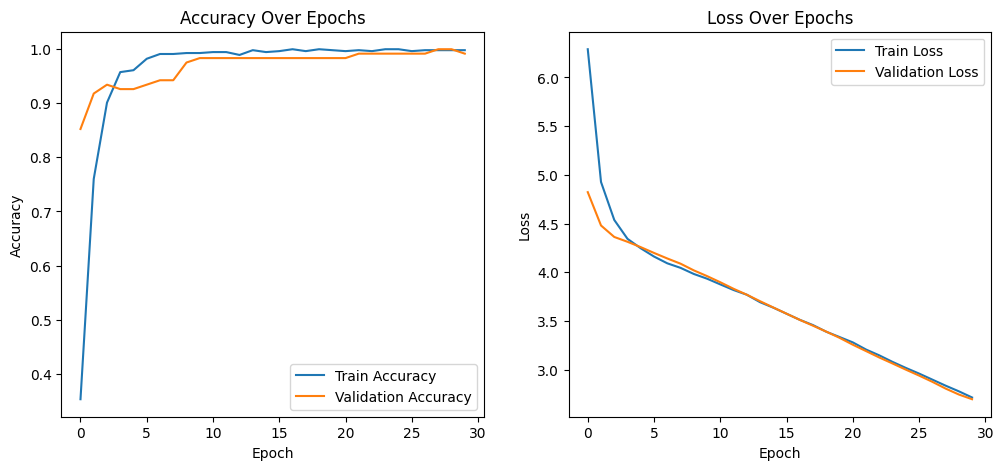

In [11]:
# Evaluasi
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Plot hasil training
plt.figure(figsize=(12, 5))

# Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()



# Visualisasi


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 770ms/step


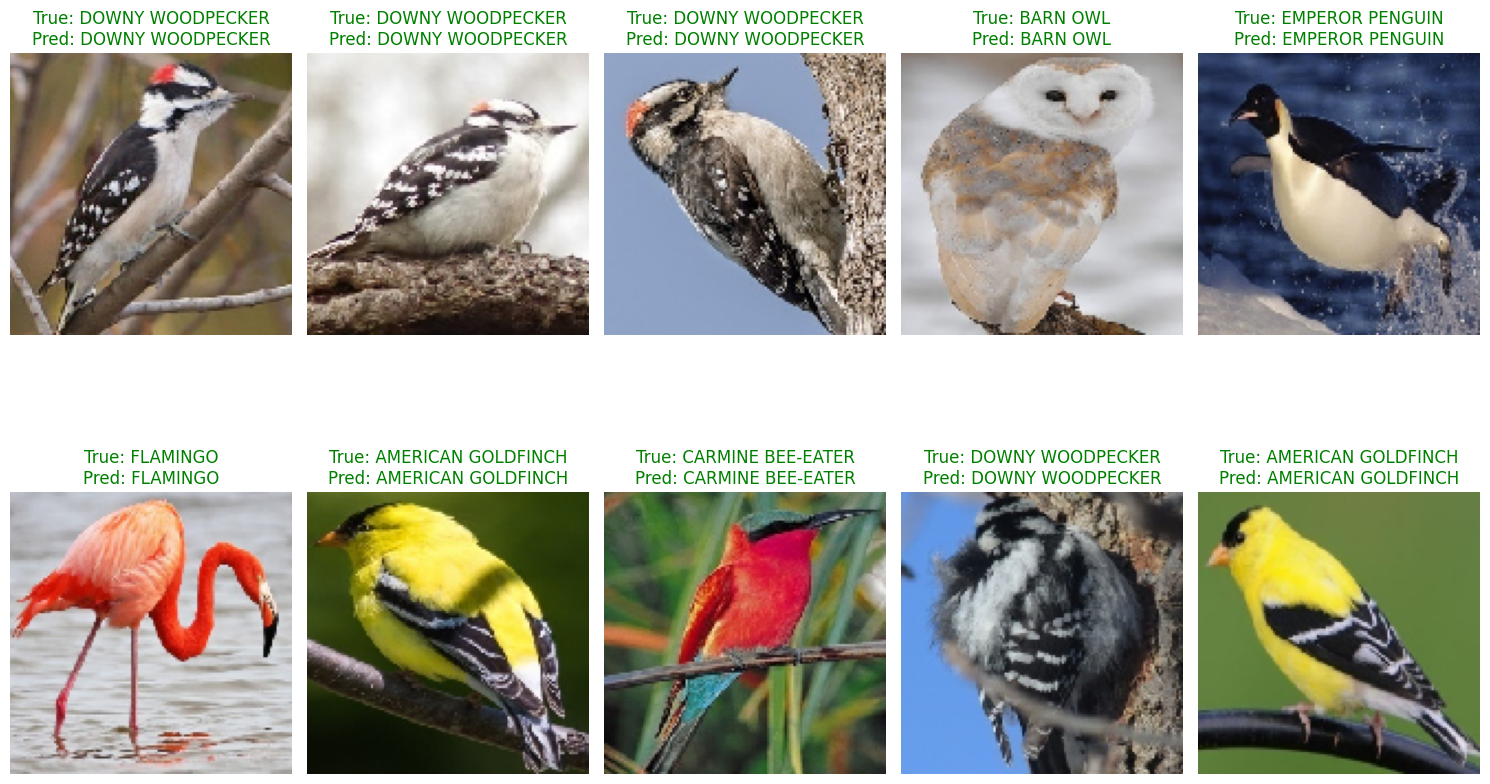

In [12]:
# Fungsi untuk visualisasi prediksi
def plot_predictions(images, true_labels, pred_labels, class_names, num_images=10):
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        ax = plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        true_label = class_names[true_labels[i]]
        pred_label = class_names[pred_labels[i]]
        color = 'green' if true_label == pred_label else 'red'
        plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Prediksi pada test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Visualisasi 10 gambar pertama
plot_predictions(X_test[:10], y_test[:10], predicted_labels[:10], class_names)


# Prediksi jenis burung flamingo

Saving flam.jpg to flam.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Gambar: flam.jpg
Prediksi: FLAMINGO (Confidence: 100.00%)


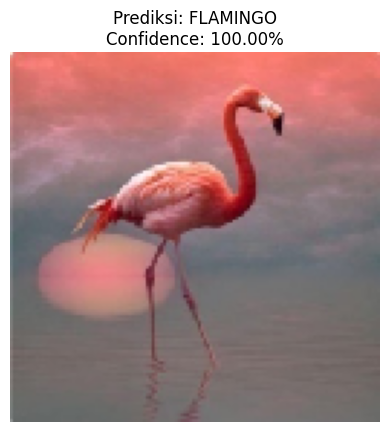

In [13]:
from tensorflow.keras.utils import load_img, img_to_array
from google.colab import files
import numpy as np

# Fungsi untuk memprediksi gambar baru
def predict_image(model, class_names, img_path):
    # Load gambar
    img = load_img(img_path, target_size=(128, 128))
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalisasi
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch

    # Prediksi
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    confidence = predictions[0][predicted_class]

    return class_names[predicted_class], confidence

# Unggah gambar baru
uploaded = files.upload()

for img_name in uploaded.keys():
    predicted_class, confidence = predict_image(model, class_names, img_name)
    print(f"Gambar: {img_name}")
    print(f"Prediksi: {predicted_class} (Confidence: {confidence * 100:.2f}%)")

    # Tampilkan gambar dengan hasil prediksi
    img = load_img(img_name, target_size=(128, 128))
    plt.imshow(img)
    plt.title(f"Prediksi: {predicted_class}\nConfidence: {confidence * 100:.2f}%")
    plt.axis('off')
    plt.show()


# Prediksi jenis burung barn owl

Saving owl.jpg to owl.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Gambar: owl.jpg
Prediksi: BARN OWL (Confidence: 96.39%)


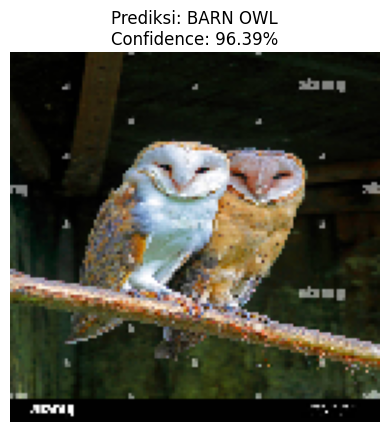

In [14]:
from tensorflow.keras.utils import load_img, img_to_array
from google.colab import files
import numpy as np

# Fungsi untuk memprediksi gambar baru
def predict_image(model, class_names, img_path):
    # Load gambar
    img = load_img(img_path, target_size=(128, 128))
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalisasi
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch

    # Prediksi
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    confidence = predictions[0][predicted_class]

    return class_names[predicted_class], confidence

# Unggah gambar baru
uploaded = files.upload()

for img_name in uploaded.keys():
    predicted_class, confidence = predict_image(model, class_names, img_name)
    print(f"Gambar: {img_name}")
    print(f"Prediksi: {predicted_class} (Confidence: {confidence * 100:.2f}%)")

    # Tampilkan gambar dengan hasil prediksi
    img = load_img(img_name, target_size=(128, 128))
    plt.imshow(img)
    plt.title(f"Prediksi: {predicted_class}\nConfidence: {confidence * 100:.2f}%")
    plt.axis('off')
    plt.show()


# Prediksi jenis burung emperor penguin

Saving pinguin.jpg to pinguin.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Gambar: pinguin.jpg
Prediksi: EMPEROR PENGUIN (Confidence: 100.00%)


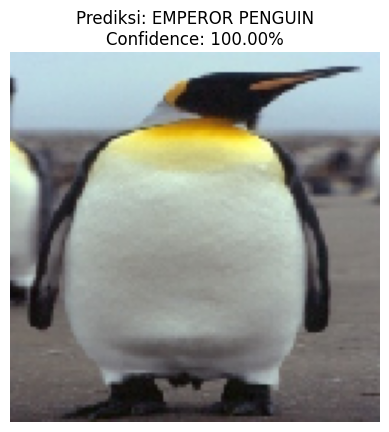

In [17]:
from tensorflow.keras.utils import load_img, img_to_array
from google.colab import files
import numpy as np

# Fungsi untuk memprediksi gambar baru
def predict_image(model, class_names, img_path):
    # Load gambar
    img = load_img(img_path, target_size=(128, 128))
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalisasi
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch

    # Prediksi
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    confidence = predictions[0][predicted_class]

    return class_names[predicted_class], confidence

# Unggah gambar baru
uploaded = files.upload()

for img_name in uploaded.keys():
    predicted_class, confidence = predict_image(model, class_names, img_name)
    print(f"Gambar: {img_name}")
    print(f"Prediksi: {predicted_class} (Confidence: {confidence * 100:.2f}%)")

    # Tampilkan gambar dengan hasil prediksi
    img = load_img(img_name, target_size=(128, 128))
    plt.imshow(img)
    plt.title(f"Prediksi: {predicted_class}\nConfidence: {confidence * 100:.2f}%")
    plt.axis('off')
    plt.show()


# Prediksi jenis burung carmine bee-eater

Saving brg.jpg to brg.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Gambar: brg.jpg
Prediksi: CARMINE BEE-EATER (Confidence: 97.50%)


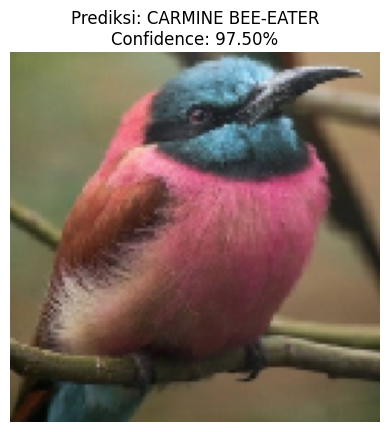

In [18]:
import os

for file_name in os.listdir():
    if file_name.endswith(('.png', '.jpg', '.jpeg')):  # Hapus hanya file gambar
        os.remove(file_name)

# Unggah gambar baru
uploaded = files.upload()

# Prediksi pada gambar baru
for img_name in uploaded.keys():
    predicted_class, confidence = predict_image(model, class_names, img_name)
    print(f"Gambar: {img_name}")
    print(f"Prediksi: {predicted_class} (Confidence: {confidence * 100:.2f}%)")

    # Tampilkan gambar dengan hasil prediksi
    img = load_img(img_name, target_size=(128, 128))
    plt.imshow(img)
    plt.title(f"Prediksi: {predicted_class}\nConfidence: {confidence * 100:.2f}%")
    plt.axis('off')
    plt.show()
